In [1]:
%matplotlib inline
import torch
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

from vinn.inference import Trainer
from vinn.models import BayesianLeNet5
from vinn.visualize import plt_training

In [2]:
batch_size = 32
n_epochs = 10#100
lr = 1e-3
milestones = [80, 90]
verbosity = 1
path = 'MNIST_parameters.pt'
reparam = 'local'#default
prior_scale=1.0#[100, 0.001]
prior_pi=None#[.5, .5]
device_ids=[0]

#   1 | ELBO Loss: 139683.07 | Accuracy:  90.87 % [ 96.67 %] | KL: 122905.68 | NLL: 16777.39 |
#   2 | ELBO Loss: 82921.25 | Accuracy:  96.41 % [ 97.01 %] | KL: 75777.22 | NLL: 7144.03 |
#   3 | ELBO Loss: 59020.68 | Accuracy:  96.73 % [ 97.22 %] | KL: 52472.86 | NLL: 6547.82 |
#   4 | ELBO Loss: 46269.61 | Accuracy:  96.98 % [ 97.42 %] | KL: 40115.97 | NLL: 6153.64 |
#   5 | ELBO Loss: 38024.30 | Accuracy:  97.20 % [ 97.36 %] | KL: 32312.71 | NLL: 5711.59 |
#   6 | ELBO Loss: 32178.56 | Accuracy:  97.40 % [ 97.71 %] | KL: 26956.99 | NLL: 5221.57 |
#   7 | ELBO Loss: 28355.93 | Accuracy:  97.50 % [ 97.67 %] | KL: 23170.03 | NLL: 5185.91 |
#   8 | ELBO Loss: 25392.21 | Accuracy:  97.60 % [ 97.54 %] | KL: 20342.60 | NLL: 5049.61 |
#   9 | ELBO Loss: 22991.29 | Accuracy:  97.64 % [ 97.90 %] | KL: 18147.10 | NLL: 4844.19 |
#  10 | ELBO Loss: 21142.95 | Accuracy:  97.72 % [ 97.84 %] | KL: 16426.71 | NLL: 4716.24 |

Training time: 0 h 5 min 54 s


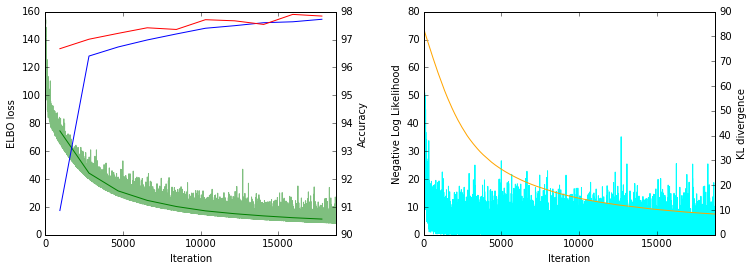

In [3]:
train_dataset = MNIST(root="data/MNIST", download=True, train=True, transform=transforms.ToTensor())
test_dataset = MNIST(root="data/MNIST", download=True, train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

net = BayesianLeNet5(n_outputs=10, 
                    n_channels=1, 
                    img_size=28, 
                    prior_scale=prior_scale, 
                    prior_pi=prior_pi,
                    reparam=reparam)

trainer = Trainer(net, train_loader, val_loader, device_ids)

trainer.train(n_epochs=n_epochs, 
              criterion=torch.nn.CrossEntropyLoss, 
              optimizer=torch.optim.Adam,
              opt_kwargs={'lr': lr}, 
              scheduler=MultiStepLR, 
              sched_kwargs={'milestones': milestones}, 
              verbosity=verbosity)

trainer.save(path)

plt_training(trainer.train_data, legend=False)